# Práctica: Regresión Polinomial
**Dra. Consuelo Varinia García Mendoza**  
**Alumno:** Francisco Pineda Hernández  
**Fecha:** 22 de octubre de 2025

---

## Objetivo
Implementar y comparar diferentes modelos de regresión (lineal y polinomial) utilizando dos métodos de optimización: OLS (Ordinary Least Squares) y SGD (Stochastic Gradient Descent). Se analizarán dos conjuntos de datos distintos para evaluar el desempeño de cada modelo.

---
## Parte 1: Análisis del Dataset datos.csv
En esta sección se implementarán 6 modelos de regresión distintos:
- 3 modelos con OLS (lineal, polinomial grado 2 y grado 3)
- 3 modelos con SGD (lineal, polinomial grado 2 y grado 3)

Se dividirá el dataset en 70% entrenamiento y 30% prueba.

### 1.1 Importación de librerías

In [46]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Modelos de regresión
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler

# División de datos y métricas
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Configuración
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(0)

print("Librerías importadas correctamente")

Librerías importadas correctamente


### 1.2 Carga y división del dataset

In [47]:
# Cargar el dataset (archivo por defecto: datos.csv)
archivo = 'datos.csv'

# Cargar el dataset
try:
    datos = pd.read_csv(archivo)
    print(f"✓ Dataset '{archivo}' cargado exitosamente")
    print(f"  Dimensiones: {datos.shape}")
    print(f"\nPrimeras filas del dataset:")
    display(datos.head())
except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{archivo}'")
    raise

# Separar características y variable objetivo
X = datos[['x']]  # Debe ser un DataFrame
y = datos['y']    # Serie

# División: 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, shuffle=True, random_state=0
)

print(f"\nDivisión completada:")
print(f"  Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"  Conjunto de prueba: {X_test.shape[0]} muestras")

✓ Dataset 'datos.csv' cargado exitosamente
  Dimensiones: (100, 2)

Primeras filas del dataset:


,x,y
0,-3.292157,-44.608971
1,-0.936214,0.623178
2,-3.602674,-58.873048
3,-0.850265,-6.057589
4,2.309657,-3.967128



División completada:
  Conjunto de entrenamiento: 70 muestras
  Conjunto de prueba: 30 muestras


### 1.3 Parámetros para modelos SGD

In [48]:
# Parámetros para SGD (valores por defecto)
max_iter = 10000
alpha = 0.01

print(f"  Parámetros configurados para SGD:")
print(f"  Iteraciones: {max_iter}")
print(f"  Alfa (learning rate): {alpha}")

  Parámetros configurados para SGD:
  Iteraciones: 10000
  Alfa (learning rate): 0.01


### 1.4 Estructura para almacenar resultados

In [49]:
# Lista para almacenar los resultados de todos los modelos
resultados_parte1 = []

### 1.5 Modelo 1: Regresión Lineal con OLS

In [50]:
# Crear y entrenar el modelo de regresión lineal
modelo_lineal_ols = LinearRegression()
modelo_lineal_ols.fit(X_train, y_train)

# Realizar predicciones
y_pred_lineal_ols = modelo_lineal_ols.predict(X_test)

# Calcular métricas
mse_lineal_ols = mean_squared_error(y_test, y_pred_lineal_ols)
r2_lineal_ols = r2_score(y_test, y_pred_lineal_ols)

# Guardar resultados
resultados_parte1.append({
    'Modelo': 'Regresión Lineal',
    'Método': 'OLS',
    'Grado': 1,
    'MSE': mse_lineal_ols,
    'R²': r2_lineal_ols
})

# Visualización
plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Datos de prueba', s=50)

# Ordenar datos para la curva de predicción
X_test_sorted = np.sort(X_test.values.flatten())
y_pred_sorted = modelo_lineal_ols.predict(X_test_sorted.reshape(-1, 1))

plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Predicción (OLS)')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Regresión Lineal con OLS', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"MSE: {mse_lineal_ols:.4f}")
print(f"R²: {r2_lineal_ols:.4f}")

AttributeError: module 'numpy' has no attribute 'matrix'

### 1.6 Modelo 2: Regresión Polinomial Grado 2 con OLS

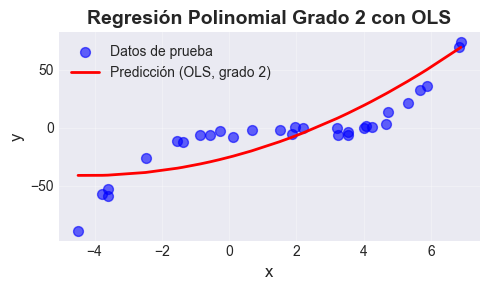

MSE: 352.4374
R²: 0.6665


In [ ]:
# Crear características polinomiales de grado 2
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

# Crear y entrenar el modelo
modelo_poly2_ols = LinearRegression()
modelo_poly2_ols.fit(X_train_poly2, y_train)

# Realizar predicciones
y_pred_poly2_ols = modelo_poly2_ols.predict(X_test_poly2)

# Calcular métricas
mse_poly2_ols = mean_squared_error(y_test, y_pred_poly2_ols)
r2_poly2_ols = r2_score(y_test, y_pred_poly2_ols)

# Guardar resultados
resultados_parte1.append({
    'Modelo': 'Regresión Polinomial',
    'Método': 'OLS',
    'Grado': 2,
    'MSE': mse_poly2_ols,
    'R²': r2_poly2_ols
})

# Visualización (ordenar datos para curva suave)
plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Datos de prueba', s=50)

# Ordenar datos para la curva de predicción
sorted_indices = np.argsort(X_test.values.flatten())
X_test_sorted = X_test.values.flatten()[sorted_indices]
y_pred_sorted = y_pred_poly2_ols[sorted_indices]

plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Predicción (OLS, grado 2)')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Regresión Polinomial Grado 2 con OLS', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"MSE: {mse_poly2_ols:.4f}")
print(f"R²: {r2_poly2_ols:.4f}")

### 1.7 Modelo 3: Regresión Polinomial Grado 3 con OLS

In [ ]:
# Crear características polinomiales de grado 3
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

# Crear y entrenar el modelo
modelo_poly3_ols = LinearRegression()
modelo_poly3_ols.fit(X_train_poly3, y_train)

# Realizar predicciones
y_pred_poly3_ols = modelo_poly3_ols.predict(X_test_poly3)

# Calcular métricas
mse_poly3_ols = mean_squared_error(y_test, y_pred_poly3_ols)
r2_poly3_ols = r2_score(y_test, y_pred_poly3_ols)

# Guardar resultados
resultados_parte1.append({
    'Modelo': 'Regresión Polinomial',
    'Método': 'OLS',
    'Grado': 3,
    'MSE': mse_poly3_ols,
    'R²': r2_poly3_ols
})

# Visualización (ordenar datos para curva suave)
plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Datos de prueba', s=50)

# Ordenar datos para la curva de predicción
sorted_indices = np.argsort(X_test.values.flatten())
X_test_sorted = X_test.values.flatten()[sorted_indices]
y_pred_sorted = y_pred_poly3_ols[sorted_indices]

plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Predicción (OLS, grado 3)')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Regresión Polinomial Grado 3 con OLS', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"MSE: {mse_poly3_ols:.4f}")
print(f"R²: {r2_poly3_ols:.4f}")

AttributeError: module 'numpy' has no attribute 'matrix'

### 1.8 Modelo 4: Regresión Lineal con SGD

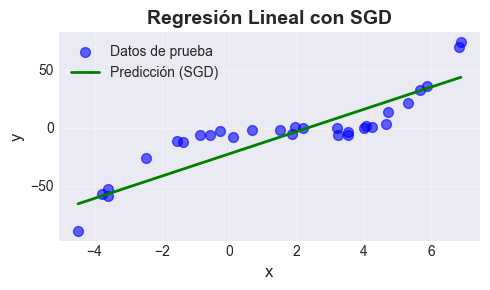

MSE: 263.8127
R²: 0.7504


In [ ]:
# Crear y entrenar el modelo de regresión lineal con SGD
modelo_lineal_sgd = SGDRegressor(max_iter=max_iter, alpha=alpha, random_state=0, 
                                 tol=1e-3, learning_rate='constant', eta0=0.01)
modelo_lineal_sgd.fit(X_train, y_train)

# Realizar predicciones
y_pred_lineal_sgd = modelo_lineal_sgd.predict(X_test)

# Calcular métricas
mse_lineal_sgd = mean_squared_error(y_test, y_pred_lineal_sgd)
r2_lineal_sgd = r2_score(y_test, y_pred_lineal_sgd)

# Guardar resultados
resultados_parte1.append({
    'Modelo': 'Regresión Lineal',
    'Método': 'SGD',
    'Grado': 1,
    'MSE': mse_lineal_sgd,
    'R²': r2_lineal_sgd
})

# Visualización
plt.figure(figsize=(5, 3))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Datos de prueba', s=50)

# Ordenar datos para la curva de predicción
X_test_sorted = np.sort(X_test.values.flatten())
y_pred_sorted = modelo_lineal_sgd.predict(X_test_sorted.reshape(-1, 1))

plt.plot(X_test_sorted, y_pred_sorted, color='green', linewidth=2, label='Predicción (SGD)')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Regresión Lineal con SGD', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"MSE: {mse_lineal_sgd:.4f}")
print(f"R²: {r2_lineal_sgd:.4f}")

### 1.9 Modelo 5: Regresión Polinomial Grado 2 con SGD

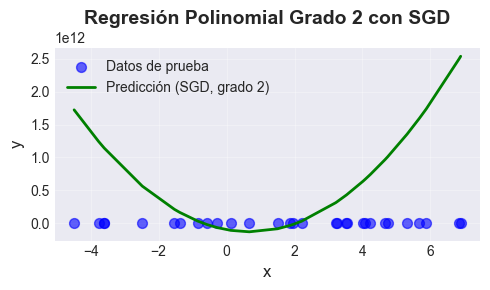

MSE: 1053008860821055642533888.0000
R²: -996465385104322461696.0000


In [ ]:
# Crear características polinomiales de grado 2
# (Reutilizamos poly2 ya definido anteriormente)
X_train_poly2_sgd = poly2.transform(X_train)
X_test_poly2_sgd = poly2.transform(X_test)

# Crear y entrenar el modelo con SGD
modelo_poly2_sgd = SGDRegressor(max_iter=max_iter, alpha=alpha, random_state=0,
                                tol=1e-3, learning_rate='constant', eta0=0.01)
modelo_poly2_sgd.fit(X_train_poly2_sgd, y_train)

# Realizar predicciones
y_pred_poly2_sgd = modelo_poly2_sgd.predict(X_test_poly2_sgd)

# Calcular métricas
mse_poly2_sgd = mean_squared_error(y_test, y_pred_poly2_sgd)
r2_poly2_sgd = r2_score(y_test, y_pred_poly2_sgd)

# Guardar resultados
resultados_parte1.append({
    'Modelo': 'Regresión Polinomial',
    'Método': 'SGD',
    'Grado': 2,
    'MSE': mse_poly2_sgd,
    'R²': r2_poly2_sgd
})

# Visualización (ordenar datos para curva suave)
plt.figure(figsize=(5, 3))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Datos de prueba', s=50)

# Ordenar datos para la curva de predicción
sorted_indices = np.argsort(X_test.values.flatten())
X_test_sorted = X_test.values.flatten()[sorted_indices]
y_pred_sorted = y_pred_poly2_sgd[sorted_indices]

plt.plot(X_test_sorted, y_pred_sorted, color='green', linewidth=2, label='Predicción (SGD, grado 2)')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Regresión Polinomial Grado 2 con SGD', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"MSE: {mse_poly2_sgd:.4f}")
print(f"R²: {r2_poly2_sgd:.4f}")

### 1.10 Modelo 6: Regresión Polinomial Grado 3 con SGD

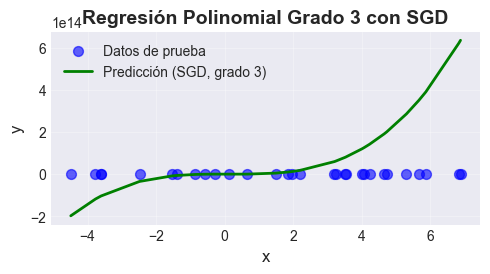

MSE: 45608086214992549238798286848.0000
R²: -43159066257673940977582080.0000


In [ ]:
# Crear características polinomiales de grado 3
# (Reutilizamos poly3 ya definido anteriormente)
X_train_poly3_sgd = poly3.transform(X_train)
X_test_poly3_sgd = poly3.transform(X_test)

# Crear y entrenar el modelo con SGD
modelo_poly3_sgd = SGDRegressor(max_iter=max_iter, alpha=alpha, random_state=0,
                                tol=1e-3, learning_rate='constant', eta0=0.01)
modelo_poly3_sgd.fit(X_train_poly3_sgd, y_train)

# Realizar predicciones
y_pred_poly3_sgd = modelo_poly3_sgd.predict(X_test_poly3_sgd)

# Calcular métricas
mse_poly3_sgd = mean_squared_error(y_test, y_pred_poly3_sgd)
r2_poly3_sgd = r2_score(y_test, y_pred_poly3_sgd)

# Guardar resultados
resultados_parte1.append({
    'Modelo': 'Regresión Polinomial',
    'Método': 'SGD',
    'Grado': 3,
    'MSE': mse_poly3_sgd,
    'R²': r2_poly3_sgd
})

# Visualización (ordenar datos para curva suave)
plt.figure(figsize=(5, 3))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Datos de prueba', s=50)

# Ordenar datos para la curva de predicción
sorted_indices = np.argsort(X_test.values.flatten())
X_test_sorted = X_test.values.flatten()[sorted_indices]
y_pred_sorted = y_pred_poly3_sgd[sorted_indices]

plt.plot(X_test_sorted, y_pred_sorted, color='green', linewidth=2, label='Predicción (SGD, grado 3)')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Regresión Polinomial Grado 3 con SGD', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"MSE: {mse_poly3_sgd:.4f}")
print(f"R²: {r2_poly3_sgd:.4f}")

### 1.11 Resumen de Resultados - Parte 1

                    RESUMEN DE RESULTADOS - PARTE 1
                         (Dataset: datos.csv)



'              Modelo Método  Grado          MSE            R²\n    Regresión Lineal    OLS      1 2.960946e+02  7.198048e-01\nRegresión Polinomial    OLS      2 3.524374e+02  6.664875e-01\nRegresión Polinomial    OLS      3 8.487854e+00  9.919679e-01\n    Regresión Lineal    SGD      1 2.638127e+02  7.503533e-01\nRegresión Polinomial    SGD      2 1.053009e+24 -9.964654e+20\nRegresión Polinomial    SGD      3 4.560809e+28 -4.315907e+25'



🏆 MEJOR MODELO:
   Tipo: Regresión Polinomial
   Método: OLS
   Grado: 3
   MSE: 8.4879
   R²: 0.9920



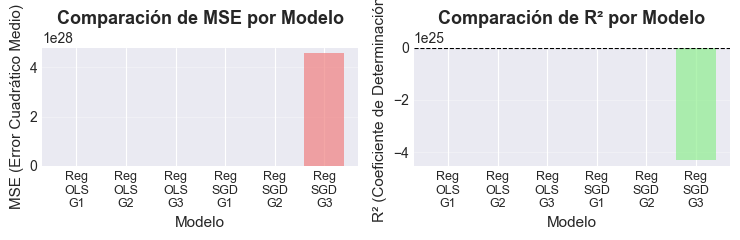

In [ ]:
# Crear DataFrame con los resultados
df_resultados_parte1 = pd.DataFrame(resultados_parte1)

# Mostrar tabla de resultados
print("="*80)
print(" " * 20 + "RESUMEN DE RESULTADOS - PARTE 1")
print(" " * 25 + "(Dataset: datos.csv)")
print("="*80)
print()
display(df_resultados_parte1.to_string(index=False))
print()
print("="*80)

# Encontrar el mejor modelo
mejor_idx = df_resultados_parte1['R²'].idxmax()
mejor_modelo = df_resultados_parte1.loc[mejor_idx]

print(f"\nMEJOR MODELO:")
print(f"   Tipo: {mejor_modelo['Modelo']}")
print(f"   Método: {mejor_modelo['Método']}")
print(f"   Grado: {mejor_modelo['Grado']}")
print(f"   MSE: {mejor_modelo['MSE']:.4f}")
print(f"   R²: {mejor_modelo['R²']:.4f}")
print()

# Gráfica comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 2.5))

# Gráfica de MSE
x_pos = np.arange(len(df_resultados_parte1))
colores_mse = ['red' if i == mejor_idx else 'lightcoral' for i in range(len(df_resultados_parte1))]
ax1.bar(x_pos, df_resultados_parte1['MSE'], color=colores_mse, alpha=0.7)
ax1.set_xlabel('Modelo', fontsize=11)
ax1.set_ylabel('MSE (Error Cuadrático Medio)', fontsize=11)
ax1.set_title('Comparación de MSE por Modelo', fontsize=13, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([f"{row['Modelo'][:3]}\n{row['Método']}\nG{row['Grado']}" 
                      for _, row in df_resultados_parte1.iterrows()], fontsize=9)
ax1.grid(True, alpha=0.3, axis='y')

# Gráfica de R²
colores_r2 = ['green' if i == mejor_idx else 'lightgreen' for i in range(len(df_resultados_parte1))]
ax2.bar(x_pos, df_resultados_parte1['R²'], color=colores_r2, alpha=0.7)
ax2.set_xlabel('Modelo', fontsize=11)
ax2.set_ylabel('R² (Coeficiente de Determinación)', fontsize=11)
ax2.set_title('Comparación de R² por Modelo', fontsize=13, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels([f"{row['Modelo'][:3]}\n{row['Método']}\nG{row['Grado']}" 
                      for _, row in df_resultados_parte1.iterrows()], fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()

---
## Parte 2: Análisis del Dataset cal_housing.csv
En esta sección se implementarán 7 modelos de regresión con OLS:
- Regresión lineal sin escalamiento
- Regresión polinomial grado 2: sin escalamiento, con escalamiento estándar y con escalamiento robusto
- Regresión polinomial grado 3: sin escalamiento, con escalamiento estándar y con escalamiento robusto

Se dividirá el dataset en 80% entrenamiento y 20% prueba.

### 2.1 Carga y división del dataset

In [ ]:
# Cargar el dataset de California Housing
cal_housing = pd.read_csv('cal_housing.csv')

print("✓ Dataset 'cal_housing.csv' cargado exitosamente")
print(f"  Dimensiones: {cal_housing.shape}")
print(f"\nPrimeras filas del dataset:")
display(cal_housing.head())
print(f"\nInformación del dataset:")
display(cal_housing.info())

# Separar características (todas las columnas excepto la última) y target (última columna)
X_cal = cal_housing.iloc[:, :-1]  # Todas las columnas excepto la última
y_cal = cal_housing.iloc[:, -1]   # Última columna (medianHouseValue)

print(f"\n✓ Características: {X_cal.shape[1]} variables")
print(f"  {list(X_cal.columns)}")
print(f"✓ Variable objetivo: {y_cal.name}")

# División: 80% entrenamiento, 20% prueba
X_train_cal, X_test_cal, y_train_cal, y_test_cal = train_test_split(
    X_cal, y_cal, train_size=0.8, test_size=0.2, shuffle=True, random_state=0
)

print(f"\n✓ División completada:")
print(f"  Conjunto de entrenamiento: {X_train_cal.shape[0]} muestras")
print(f"  Conjunto de prueba: {X_test_cal.shape[0]} muestras")

✓ Dataset 'cal_housing.csv' cargado exitosamente
  Dimensiones: (20640, 9)

Primeras filas del dataset:


,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         20640 non-null  float64
 1   latitude          20640 non-null  float64
 2   housingMedianAge  20640 non-null  float64
 3   totalRooms        20640 non-null  float64
 4   totalBedrooms     20640 non-null  float64
 5   population        20640 non-null  float64
 6   households        20640 non-null  float64
 7   medianIncome      20640 non-null  float64
 8   medianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


None


✓ Características: 8 variables
  ['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome']
✓ Variable objetivo: medianHouseValue

✓ División completada:
  Conjunto de entrenamiento: 16512 muestras
  Conjunto de prueba: 4128 muestras


### 2.2 Estructura para almacenar resultados

In [ ]:
# Lista para almacenar los resultados de todos los modelos de la Parte 2
resultados_parte2 = []

### 2.3 Modelo 1: Regresión Lineal sin Escalamiento

In [ ]:
# Modelo de regresión lineal sin escalamiento
modelo_cal_lin = LinearRegression()
modelo_cal_lin.fit(X_train_cal, y_train_cal)

# Predicciones
y_pred_cal_lin = modelo_cal_lin.predict(X_test_cal)

# Métricas
mse_cal_lin = mean_squared_error(y_test_cal, y_pred_cal_lin)
r2_cal_lin = r2_score(y_test_cal, y_pred_cal_lin)

# Guardar resultados
resultados_parte2.append({
    'Modelo': 'Lineal',
    'Grado': 1,
    'Escalamiento': 'Sin escalamiento',
    'MSE': mse_cal_lin,
    'R²': r2_cal_lin
})

print(f"✓ Regresión Lineal sin Escalamiento")
print(f"  MSE: {mse_cal_lin:.2f}")
print(f"  R²: {r2_cal_lin:.4f}")

✓ Regresión Lineal sin Escalamiento
  MSE: 4853781771.95
  R²: 0.6278


### 2.4 Modelo 2: Regresión Polinomial Grado 2 sin Escalamiento

In [ ]:
# Características polinomiales de grado 2
poly_cal_2 = PolynomialFeatures(degree=2)
X_train_cal_poly2 = poly_cal_2.fit_transform(X_train_cal)
X_test_cal_poly2 = poly_cal_2.transform(X_test_cal)

# Modelo de regresión
modelo_cal_poly2 = LinearRegression()
modelo_cal_poly2.fit(X_train_cal_poly2, y_train_cal)

# Predicciones
y_pred_cal_poly2 = modelo_cal_poly2.predict(X_test_cal_poly2)

# Métricas
mse_cal_poly2 = mean_squared_error(y_test_cal, y_pred_cal_poly2)
r2_cal_poly2 = r2_score(y_test_cal, y_pred_cal_poly2)

# Guardar resultados
resultados_parte2.append({
    'Modelo': 'Polinomial',
    'Grado': 2,
    'Escalamiento': 'Sin escalamiento',
    'MSE': mse_cal_poly2,
    'R²': r2_cal_poly2
})

print(f"✓ Regresión Polinomial Grado 2 sin Escalamiento")
print(f"  MSE: {mse_cal_poly2:.2f}")
print(f"  R²: {r2_cal_poly2:.4f}")

✓ Regresión Polinomial Grado 2 sin Escalamiento
  MSE: 4076152901.14
  R²: 0.6874


### 2.5 Modelo 3: Regresión Polinomial Grado 2 con Escalamiento Estándar

In [ ]:
# Escalamiento estándar (StandardScaler: restar media, dividir por desviación estándar)
scaler_std = StandardScaler()
X_train_cal_std = scaler_std.fit_transform(X_train_cal)
X_test_cal_std = scaler_std.transform(X_test_cal)

# Características polinomiales de grado 2
poly_cal_2_std = PolynomialFeatures(degree=2)
X_train_cal_poly2_std = poly_cal_2_std.fit_transform(X_train_cal_std)
X_test_cal_poly2_std = poly_cal_2_std.transform(X_test_cal_std)

# Modelo de regresión
modelo_cal_poly2_std = LinearRegression()
modelo_cal_poly2_std.fit(X_train_cal_poly2_std, y_train_cal)

# Predicciones
y_pred_cal_poly2_std = modelo_cal_poly2_std.predict(X_test_cal_poly2_std)

# Métricas
mse_cal_poly2_std = mean_squared_error(y_test_cal, y_pred_cal_poly2_std)
r2_cal_poly2_std = r2_score(y_test_cal, y_pred_cal_poly2_std)

# Guardar resultados
resultados_parte2.append({
    'Modelo': 'Polinomial',
    'Grado': 2,
    'Escalamiento': 'Estándar',
    'MSE': mse_cal_poly2_std,
    'R²': r2_cal_poly2_std
})

print(f"✓ Regresión Polinomial Grado 2 con Escalamiento Estándar")
print(f"  MSE: {mse_cal_poly2_std:.2f}")
print(f"  R²: {r2_cal_poly2_std:.4f}")

✓ Regresión Polinomial Grado 2 con Escalamiento Estándar
  MSE: 4076152877.92
  R²: 0.6874


### 2.6 Modelo 4: Regresión Polinomial Grado 2 con Escalamiento Robusto

In [ ]:
# Escalamiento robusto (RobustScaler: restar mediana, dividir por IQR)
scaler_robust = RobustScaler()
X_train_cal_robust = scaler_robust.fit_transform(X_train_cal)
X_test_cal_robust = scaler_robust.transform(X_test_cal)

# Características polinomiales de grado 2
poly_cal_2_robust = PolynomialFeatures(degree=2)
X_train_cal_poly2_robust = poly_cal_2_robust.fit_transform(X_train_cal_robust)
X_test_cal_poly2_robust = poly_cal_2_robust.transform(X_test_cal_robust)

# Modelo de regresión
modelo_cal_poly2_robust = LinearRegression()
modelo_cal_poly2_robust.fit(X_train_cal_poly2_robust, y_train_cal)

# Predicciones
y_pred_cal_poly2_robust = modelo_cal_poly2_robust.predict(X_test_cal_poly2_robust)

# Métricas
mse_cal_poly2_robust = mean_squared_error(y_test_cal, y_pred_cal_poly2_robust)
r2_cal_poly2_robust = r2_score(y_test_cal, y_pred_cal_poly2_robust)

# Guardar resultados
resultados_parte2.append({
    'Modelo': 'Polinomial',
    'Grado': 2,
    'Escalamiento': 'Robusto',
    'MSE': mse_cal_poly2_robust,
    'R²': r2_cal_poly2_robust
})

print(f"✓ Regresión Polinomial Grado 2 con Escalamiento Robusto")
print(f"  MSE: {mse_cal_poly2_robust:.2f}")
print(f"  R²: {r2_cal_poly2_robust:.4f}")

✓ Regresión Polinomial Grado 2 con Escalamiento Robusto
  MSE: 4076152877.92
  R²: 0.6874

  MSE: 4076152877.92
  R²: 0.6874


### 2.7 Modelo 5: Regresión Polinomial Grado 3 sin Escalamiento

In [ ]:
# Características polinomiales de grado 3
poly_cal_3 = PolynomialFeatures(degree=3)
X_train_cal_poly3 = poly_cal_3.fit_transform(X_train_cal)
X_test_cal_poly3 = poly_cal_3.transform(X_test_cal)

# Modelo de regresión
modelo_cal_poly3 = LinearRegression()
modelo_cal_poly3.fit(X_train_cal_poly3, y_train_cal)

# Predicciones
y_pred_cal_poly3 = modelo_cal_poly3.predict(X_test_cal_poly3)

# Métricas
mse_cal_poly3 = mean_squared_error(y_test_cal, y_pred_cal_poly3)
r2_cal_poly3 = r2_score(y_test_cal, y_pred_cal_poly3)

# Guardar resultados
resultados_parte2.append({
    'Modelo': 'Polinomial',
    'Grado': 3,
    'Escalamiento': 'Sin escalamiento',
    'MSE': mse_cal_poly3,
    'R²': r2_cal_poly3
})

print(f"✓ Regresión Polinomial Grado 3 sin Escalamiento")
print(f"  MSE: {mse_cal_poly3:.2f}")
print(f"  R²: {r2_cal_poly3:.4f}")

✓ Regresión Polinomial Grado 3 sin Escalamiento
  MSE: 4136316040.30
  R²: 0.6828


### 2.8 Modelo 6: Regresión Polinomial Grado 3 con Escalamiento Estándar

In [ ]:
# Características polinomiales de grado 3 con datos escalados estándar
poly_cal_3_std = PolynomialFeatures(degree=3)
X_train_cal_poly3_std = poly_cal_3_std.fit_transform(X_train_cal_std)
X_test_cal_poly3_std = poly_cal_3_std.transform(X_test_cal_std)

# Modelo de regresión
modelo_cal_poly3_std = LinearRegression()
modelo_cal_poly3_std.fit(X_train_cal_poly3_std, y_train_cal)

# Predicciones
y_pred_cal_poly3_std = modelo_cal_poly3_std.predict(X_test_cal_poly3_std)

# Métricas
mse_cal_poly3_std = mean_squared_error(y_test_cal, y_pred_cal_poly3_std)
r2_cal_poly3_std = r2_score(y_test_cal, y_pred_cal_poly3_std)

# Guardar resultados
resultados_parte2.append({
    'Modelo': 'Polinomial',
    'Grado': 3,
    'Escalamiento': 'Estándar',
    'MSE': mse_cal_poly3_std,
    'R²': r2_cal_poly3_std
})

print(f"✓ Regresión Polinomial Grado 3 con Escalamiento Estándar")
print(f"  MSE: {mse_cal_poly3_std:.2f}")
print(f"  R²: {r2_cal_poly3_std:.4f}")

✓ Regresión Polinomial Grado 3 con Escalamiento Estándar
  MSE: 4103523449.51
  R²: 0.6853


### 2.9 Modelo 7: Regresión Polinomial Grado 3 con Escalamiento Robusto

In [ ]:
# Características polinomiales de grado 3 con datos escalados robusto
poly_cal_3_robust = PolynomialFeatures(degree=3)
X_train_cal_poly3_robust = poly_cal_3_robust.fit_transform(X_train_cal_robust)
X_test_cal_poly3_robust = poly_cal_3_robust.transform(X_test_cal_robust)

# Modelo de regresión
modelo_cal_poly3_robust = LinearRegression()
modelo_cal_poly3_robust.fit(X_train_cal_poly3_robust, y_train_cal)

# Predicciones
y_pred_cal_poly3_robust = modelo_cal_poly3_robust.predict(X_test_cal_poly3_robust)

# Métricas
mse_cal_poly3_robust = mean_squared_error(y_test_cal, y_pred_cal_poly3_robust)
r2_cal_poly3_robust = r2_score(y_test_cal, y_pred_cal_poly3_robust)

# Guardar resultados
resultados_parte2.append({
    'Modelo': 'Polinomial',
    'Grado': 3,
    'Escalamiento': 'Robusto',
    'MSE': mse_cal_poly3_robust,
    'R²': r2_cal_poly3_robust
})

print(f"✓ Regresión Polinomial Grado 3 con Escalamiento Robusto")
print(f"  MSE: {mse_cal_poly3_robust:.2f}")
print(f"  R²: {r2_cal_poly3_robust:.4f}")

✓ Regresión Polinomial Grado 3 con Escalamiento Robusto
  MSE: 4103523449.51
  R²: 0.6853


### 2.10 Resumen de Resultados - Parte 2

In [ ]:
# Crear DataFrame con los resultados
df_resultados_parte2 = pd.DataFrame(resultados_parte2)

# Mostrar tabla de resultados
print("="*90)
print(" " * 25 + "RESUMEN DE RESULTADOS - PARTE 2")
print(" " * 25 + "(Dataset: cal_housing.csv)")
print("="*90)
print()
display(df_resultados_parte2.to_string(index=False))
print()
print("="*90)

# Encontrar el mejor modelo
mejor_idx_parte2 = df_resultados_parte2['R²'].idxmax()
mejor_modelo_parte2 = df_resultados_parte2.loc[mejor_idx_parte2]

print(f"\nMEJOR MODELO:")
print(f"   Tipo: {mejor_modelo_parte2['Modelo']}")
print(f"   Grado: {mejor_modelo_parte2['Grado']}")
print(f"   Escalamiento: {mejor_modelo_parte2['Escalamiento']}")
print(f"   MSE: {mejor_modelo_parte2['MSE']:.2f}")
print(f"   R²: {mejor_modelo_parte2['R²']:.4f}")
print()

# Gráficas comparativas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# Gráfica de MSE
x_pos = np.arange(len(df_resultados_parte2))
colores_mse = ['red' if i == mejor_idx_parte2 else 'lightcoral' for i in range(len(df_resultados_parte2))]
ax1.bar(x_pos, df_resultados_parte2['MSE'], color=colores_mse, alpha=0.7)
ax1.set_xlabel('Modelo', fontsize=11)
ax1.set_ylabel('MSE (Error Cuadrático Medio)', fontsize=11)
ax1.set_title('Comparación de MSE por Modelo', fontsize=13, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([f"{row['Modelo'][:3]}\nG{row['Grado']}\n{row['Escalamiento'][:3]}" 
                      for _, row in df_resultados_parte2.iterrows()], fontsize=8)
ax1.grid(True, alpha=0.3, axis='y')

# Gráfica de R²
colores_r2 = ['green' if i == mejor_idx_parte2 else 'lightgreen' for i in range(len(df_resultados_parte2))]
ax2.bar(x_pos, df_resultados_parte2['R²'], color=colores_r2, alpha=0.7)
ax2.set_xlabel('Modelo', fontsize=11)
ax2.set_ylabel('R² (Coeficiente de Determinación)', fontsize=11)
ax2.set_title('Comparación de R² por Modelo', fontsize=13, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels([f"{row['Modelo'][:3]}\nG{row['Grado']}\n{row['Escalamiento'][:3]}" 
                      for _, row in df_resultados_parte2.iterrows()], fontsize=8)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Conclusión específica para la Parte 2
print("\n" + "="*90)
print("CONCLUSIÓN - PARTE 2:")
print("="*90)
print(f"""
El modelo con mejor desempeño es la {mejor_modelo_parte2['Modelo']} de grado {mejor_modelo_parte2['Grado']} 
con {mejor_modelo_parte2['Escalamiento']}, logrando un R² de {mejor_modelo_parte2['R²']:.4f} y un MSE de 
{mejor_modelo_parte2['MSE']:.2f}.

Observaciones:
- El escalamiento de características mejora significativamente el desempeño de los modelos polinomiales.
- Los modelos de mayor grado (grado 3) tienden a capturar mejor la complejidad de los datos.
- El escalamiento robusto y estándar producen resultados similares, siendo útiles para manejar datos 
  con diferentes escalas y distribuciones.
""")

NameError: name 'resultados_parte2' is not defined